# CS579: Lecture 03  
**Representing Graphs**

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

(Slides inspired in part by [Jure Leskovec](http://web.stanford.edu/class/cs224w/slides/02-gnp.pdf) and [Easley & Kleinberg](https://github.com/iit-cs579/main/blob/master/read/ek-02.pdf))

<br><br><br><br><br><br><br><br><br><br><br><br>

# Terminology

- **Graph:** A way to represent objects and their relations
  - **Node:** represents an object
  - **Edge:** represents a relation between two nodes. 
  - **Neighbor:** Two nodes are *neighbors* if they are connected by an edge.
- **Directed Graph:** Represents asymmetric (one-way) relationships
- **Undirected Graph:** Represents symmetric relationships

![graph.pdf](graph.pdf)

[Source](https://github.com/iit-cs579/main/blob/master/read/ek-02.pdf)

Examples of **directed** and **undirected** graphs?

<br><br><br><br><br>

**Path:** A sequence of nodes in which each consecutive pair are neighbors
- E.g., $A,B,C$ in Figure 2.1(a)

**Cycle:** A path of at least 3 edges, with first and last nodes the same.
- E.g., $B,C,D$ in Figure 2.1(a)

<br><br><br><br>

**Connected:** A graph is *connected* if there exists a path between each pair of nodes.
  - Example of a graph that is *not* connected?

<br><br><br><br>
**Connected Component:** A maximal subset of nodes such that each pair of nodes is connected 

![components](components.png)
[Source](https://github.com/iit-cs579/main/blob/master/read/ek-02.pdf)

- Is the global friendship network connected?

<br><br><br><br>


# Giant Connected Components

![giant](giant.png)

**Node Degree:** Number of neighbors of a node.
  - For directed graphs, distinguish between **in-degree** and **out-degree**
  
![graph.pdf](graph.pdf)

[Source](https://github.com/iit-cs579/main/blob/master/read/ek-02.pdf)


# Number of edges

If there are $N$ nodes, what is the maximum number of edges?

<br><br><br><br><br><br><br><br><br><br><br><br>

$$\frac{N(N-1)}{2}$$

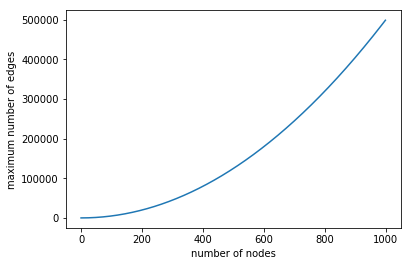

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

sizes = range(1000)
plt.plot(sizes, [s*(s-1)/2.0 for s in sizes])
plt.xlabel('number of nodes')
plt.ylabel('maximum number of edges')
plt.show()

Luckily, most real-world graphs are extremely sparse.

- E.g., you are probably not friends with over 1,000 people.

# Measuring Graphs

- How can we summarize a graph?
  - Besides number of edges and number of nodes.
  
<br><br>
  
- Allows us to determine if two graphs are "similar"

<br><br><br><br>

# Degree distribution

- Probability that a randomly chosen node has degree $k$

<br><br>

- $N_k$: number of nodes with degree $k$
- $P(k) = $ ?

<br><br><br><br><br><br><br><br><br><br>

$$P(k) = \frac{N_k}{N}$$


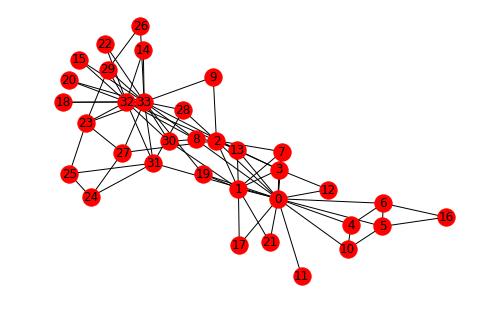

In [26]:
# See Karate Club network: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary
# First, we print the degree for each of the 34 nodes.
import networkx as nx
G=nx.karate_club_graph()
nx.draw(G, with_labels=True)

In [27]:
# dict from node id to degree
degrees = nx.degree(G)
degrees

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [28]:
degrees = dict(degrees)
degrees

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

In [30]:
# Count number of nodes with each degree value.
from collections import Counter
degree_counts = Counter(degrees.values())
degree_counts
# e.g., 11 nodes have degree of 2

Counter({16: 1,
         9: 1,
         10: 1,
         6: 2,
         3: 6,
         4: 6,
         5: 3,
         2: 11,
         1: 1,
         12: 1,
         17: 1})

[(1, 0.029411764705882353), (2, 0.3235294117647059), (3, 0.17647058823529413), (4, 0.17647058823529413), (5, 0.08823529411764706)]


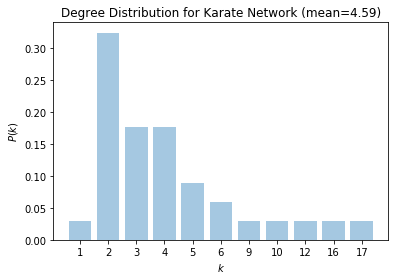

In [32]:
# Now, let's plot the bar graph for the distribution of P(k)
# probability of a node having degree k
p_k = [(degree, count / len(G.nodes()))
       for degree, count in degree_counts.items()]
p_k = sorted(p_k)
print(p_k[:5])
ks = [x[0] for x in p_k]  # Get the first element of each tuple (the degree)
# Plot the bar chart.
x_pos = range(len(ks))
plt.xticks(x_pos, ks)
plt.bar(x_pos, [x[1] for x in p_k], align='center', alpha=0.4)
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
mean = 1. * sum(degrees.values()) / len(G.nodes())
plt.title("Degree Distribution for Karate Network (mean=%.2f)" % mean)
plt.show()

A [Long Tail](http://en.wikipedia.org/wiki/Long_tail)
- We'll see a lot of these.
- The mean value of a long-tailed distribution is often misleading.

<br><br><br><br>

**Diameter:** The maximum shortest-path between any pair of nodes.

**Average path length:** The average shortest-path between any pair of nodes (in one component).

**Clustering coefficient:** The fraction of a node's neighbors that are neighbors  
(number of neighbor-neighbor links divided by number of possible neighbor-neighbor links)

$$C_i = \frac{2e_i}{k_i(k_i - 1)}$$

- $e_i$: number of edges between neighbors of node $i$
- $k_i$: degree of node $i$

**Average Clustering Coefficient:**

$$C = \frac{1}{N}\sum_i C_i  $$

![cluster](cluster.png)

$$C_i = \frac{2e_i}{k_i(k_i - 1)}$$

[Source](http://web.stanford.edu/class/cs224w/slides/02-gnp.pdf)

<br><br><br>
What is clustering coefficient of node D?

$k_D=4, e_D=2, C_D=4/12 = 1/3$

<br><br><br>

...of node B?

<br><br><br>

$k_B=2, e_B=1, C_B=2/2 = 1$



In [39]:
# dict from node id to clustering coefficient.
import numpy as np
print(np.mean(list(nx.clustering(G).values())))
nx.clustering(G)

0.5706384782076823


{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

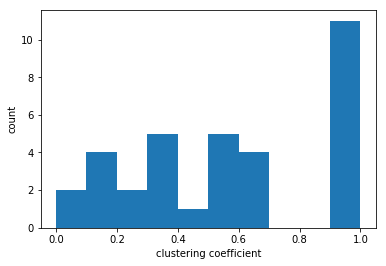

In [36]:
plt.hist(list(nx.clustering(G).values()), bins=10)
plt.xlabel('clustering coefficient')
plt.ylabel('count')
plt.show()

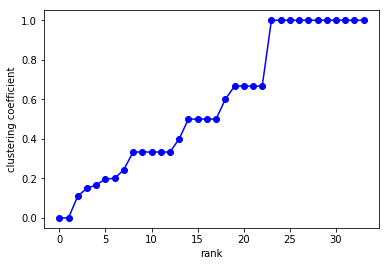

In [37]:
plt.figure()
plt.plot(sorted(list(nx.clustering(G).values())), 'bo-')
plt.xlabel('rank')
plt.ylabel('clustering coefficient')
plt.show()

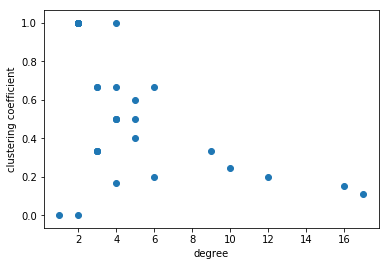

In [38]:
plt.figure()
plt.scatter(list(dict(nx.degree(G)).values()), list(nx.clustering(G).values()))
plt.xlabel('degree')
plt.ylabel('clustering coefficient')
plt.show()